In [4]:
import pandas as pd

In [5]:
data0518=pd.read_csv('Data/Histórico de datos del tráfico desde 2013/05-2018.zip',sep=';')

#Por si hay que leer elos archivos largos por partes
#chunksize = 10 ** 8
#for chunk in pd.read_csv(filename, chunksize=chunksize):
#    process(chunk)

In [6]:
data0518.head()

,id,fecha,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion
0,1001,2018-05-01 00:00:00,M30,876,2,0,70,N,5
1,1002,2018-05-01 00:00:00,M30,816,3,0,74,N,5
2,1003,2018-05-01 00:00:00,M30,972,3,0,77,N,5
3,1006,2018-05-01 00:00:00,M30,852,2,0,69,N,5
4,1009,2018-05-01 00:00:00,M30,780,2,0,67,N,5


In [7]:
data0518.dtypes

id                      int64
fecha                  object
tipo_elem              object
intensidad              int64
ocupacion               int64
carga                   int64
vmed                    int64
error                  object
periodo_integracion     int64
dtype: object

In [8]:
type(data0518['tipo_elem'][1])

str

In [9]:
type(data0518['fecha'][1])

str

Hay que poner al columna de fecha como tipo fecha y no como string

In [10]:
data0518['fecha']=pd.to_datetime(data0518['fecha'], format='%Y-%m-%d %H:%M:%S')

In [11]:
data0518.dtypes

id                              int64
fecha                  datetime64[ns]
tipo_elem                      object
intensidad                      int64
ocupacion                       int64
carga                           int64
vmed                            int64
error                          object
periodo_integracion             int64
dtype: object

In [12]:
data0518.sample(10)

,id,fecha,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion
4758192,10184,2018-05-13 19:00:00,URB,465,5,20,0,N,15
2727442,5433,2018-05-08 08:30:00,URB,441,17,71,0,N,15
7992078,10181,2018-05-22 11:15:00,URB,130,0,5,0,N,15
4591771,3705,2018-05-13 08:30:00,M30,980,4,27,46,N,15
7112707,6383,2018-05-20 02:45:00,URB,43,0,2,0,N,15
8657599,4695,2018-05-24 06:30:00,URB,83,2,5,0,N,15
2527473,10064,2018-05-07 19:30:00,URB,305,2,19,0,N,15
3304391,4268,2018-05-09 22:00:00,URB,264,2,10,0,N,15
8374475,6999,2018-05-23 11:45:00,URB,45,0,21,0,N,12
173922,5674,2018-05-01 11:15:00,URB,511,1,12,0,N,15


In [13]:
data0518.columns

Index(['id', 'fecha', 'tipo_elem', 'intensidad', 'ocupacion', 'carga', 'vmed',
       'error', 'periodo_integracion'],
      dtype='object')

In [14]:
data0518.count()
#Cuenta los datos que no son Nan

id                     11501592
fecha                  11501592
tipo_elem              11501592
intensidad             11501592
ocupacion              11501592
carga                  11501592
vmed                   11501592
error                  11501592
periodo_integracion    11501592
dtype: int64

In [15]:
data0518.shape

(11501592, 9)

Parece que no hay ningún Nan en los datos de este fichero

In [16]:
data0518.sample(10)

,id,fecha,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion
8034209,6123,2018-05-22 14:00:00,URB,282,3,21,0,N,15
4231332,6351,2018-05-12 09:15:00,URB,73,14,28,0,N,15
8853642,5603,2018-05-24 19:00:00,URB,337,6,62,0,N,15
2257816,6850,2018-05-07 02:15:00,M30,168,-1,0,72,N,5
11174967,3666,2018-05-31 01:45:00,URB,20,0,0,0,N,15
10332803,4744,2018-05-28 18:45:00,URB,621,7,44,0,N,15
11152654,6171,2018-05-30 23:45:00,URB,223,2,10,0,N,15
2624355,6231,2018-05-08 01:45:00,URB,29,0,1,0,N,15
4592720,4737,2018-05-13 08:30:00,URB,27,9,10,0,N,9
10675475,6324,2018-05-29 17:00:00,URB,282,8,28,0,N,15


Una vez hecho esto, vemos el tratamiento de las variables categóricas. En este caso: *tipo_elemento* y *error*

In [17]:
# tabla de frecuencia de de las medidas tomadas en la M30 o en calles 
pd.value_counts(data0518['tipo_elem'])

URB    10293912
M30     1207680
Name: tipo_elem, dtype: int64

Según la leyenda, puede haber 3 tipos de errores: 
- N: no ha habido errores ni sustituciones
- E: los parámetros de calidad de alguna de las muestras integradas no son óptimos.
- S: alguna de las muestras recibidas era totalmente errónea y no se ha integrado.

In [18]:
# nº de medidas categorizadas como erróneas
print(data0518.shape[0]-pd.value_counts(data0518['error']))

N    0
Name: error, dtype: int64


En este caso, y para este fichero, no hay medidas categorizadas como erróneas

### Visualización

In [19]:
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
# Compute the correlation matrix
corr = data0518.corr()

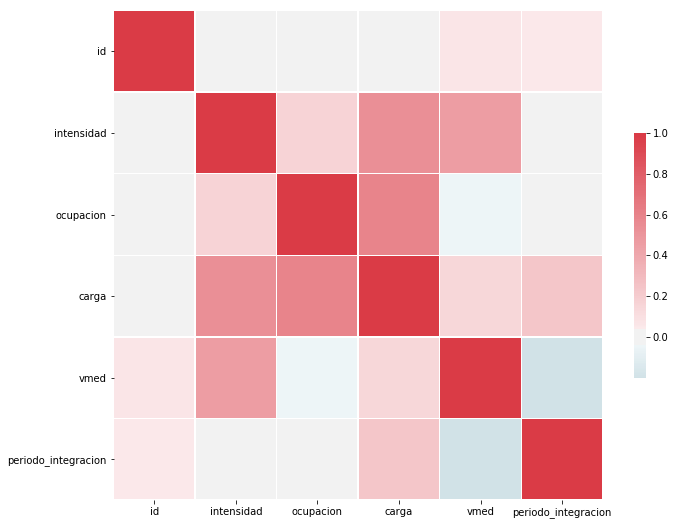

In [21]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax=sns.heatmap(corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Cogemos una muestra del dataset de 10000 features para poder obtener más resolución en la visualización

In [22]:
data0518_2=data0518.sample(10000)

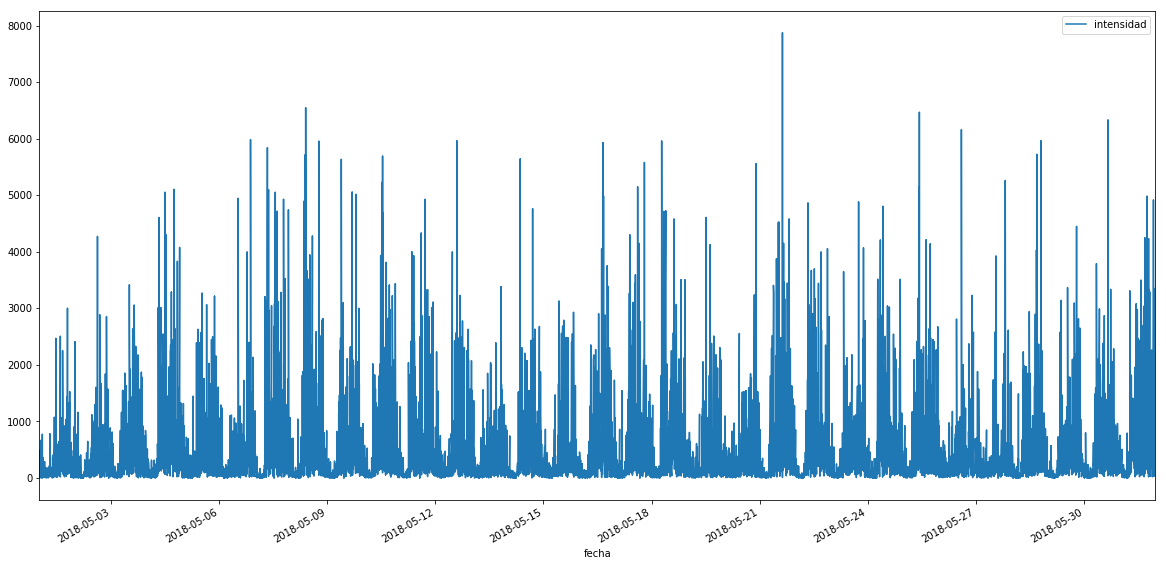

In [23]:
data0518_2.plot(x='fecha',y='intensidad',figsize=(20,10))

Dividimos la variable timestamp en fecha y hora y creamos dos nuevas variables

In [24]:
data0518['Fecha']=data0518["fecha"].dt.date
data0518['Hora']=data0518["fecha"].dt.time
data0518["Date"]=data0518["fecha"]

In [25]:
data0518.sample(10)

,id,fecha,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion,Fecha,Hora,Date
6045272,6517,2018-05-17 06:00:00,URB,171,1,6,0,N,15,2018-05-17,06:00:00,2018-05-17 06:00:00
11167048,5490,2018-05-31 01:00:00,URB,55,0,2,0,N,15,2018-05-31,01:00:00,2018-05-31 01:00:00
11452815,5836,2018-05-31 20:45:00,URB,667,12,52,0,N,15,2018-05-31,20:45:00,2018-05-31 20:45:00
5968751,6664,2018-05-17 01:00:00,M30,816,2,18,90,N,15,2018-05-17,01:00:00,2018-05-17 01:00:00
910987,3682,2018-05-03 11:30:00,URB,262,6,21,0,N,15,2018-05-03,11:30:00,2018-05-03 11:30:00
329189,7126,2018-05-01 21:15:00,M30,400,3,24,73,N,15,2018-05-01,21:15:00,2018-05-01 21:15:00
4032411,6184,2018-05-11 20:30:00,URB,43,19,36,0,N,8,2018-05-11,20:30:00,2018-05-11 20:30:00
10538894,6330,2018-05-29 08:00:00,URB,100,55,43,0,N,15,2018-05-29,08:00:00,2018-05-29 08:00:00
6103483,6195,2018-05-17 09:45:00,URB,359,10,28,0,N,15,2018-05-17,09:45:00,2018-05-17 09:45:00
5433698,6837,2018-05-15 14:30:00,M30,1056,4,0,56,N,5,2018-05-15,14:30:00,2018-05-15 14:30:00


In [26]:
data0518 = data0518.drop('fecha', 1)
#donde 1 es el número de eje ( 0 para filas y 1 para columnas). 

In [27]:
data0518.sample(10)

,id,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion,Fecha,Hora,Date
48360,5545,URB,11,0,0,0,N,15,2018-05-01,03:00:00,2018-05-01 03:00:00
640747,5204,URB,27,8,7,0,N,15,2018-05-02,17:45:00,2018-05-02 17:45:00
6466101,3536,M30,2460,18,75,50,N,15,2018-05-18,09:30:00,2018-05-18 09:30:00
6505826,3921,URB,1423,7,40,0,N,15,2018-05-18,12:00:00,2018-05-18 12:00:00
2567078,10304,URB,189,1,8,0,N,10,2018-05-07,22:00:00,2018-05-07 22:00:00
997754,4130,URB,774,2,37,0,N,15,2018-05-03,17:00:00,2018-05-03 17:00:00
2897034,5856,URB,650,4,48,0,N,15,2018-05-08,19:15:00,2018-05-08 19:15:00
7196352,5538,URB,25,0,1,0,N,8,2018-05-20,08:15:00,2018-05-20 08:15:00
2937961,10289,URB,120,15,22,0,N,15,2018-05-08,21:45:00,2018-05-08 21:45:00
7416422,7014,M30,336,3,20,66,N,15,2018-05-20,22:15:00,2018-05-20 22:15:00


In [28]:
data0518.dtypes

id                              int64
tipo_elem                      object
intensidad                      int64
ocupacion                       int64
carga                           int64
vmed                            int64
error                          object
periodo_integracion             int64
Fecha                          object
Hora                           object
Date                   datetime64[ns]
dtype: object

Filtrado por sensor

In [29]:
data0518.loc[data0518['id'] == 6806]

,id,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion,Fecha,Hora,Date
3174,6806,M30,152,2,9,58,N,15,2018-05-01,00:00:00,2018-05-01 00:00:00
7035,6806,M30,136,2,10,65,N,15,2018-05-01,00:15:00,2018-05-01 00:15:00
10911,6806,M30,133,2,9,62,N,15,2018-05-01,00:30:00,2018-05-01 00:30:00
14784,6806,M30,91,1,7,56,N,15,2018-05-01,00:45:00,2018-05-01 00:45:00
18661,6806,M30,80,2,6,54,N,15,2018-05-01,01:00:00,2018-05-01 01:00:00
22529,6806,M30,84,2,5,61,N,15,2018-05-01,01:15:00,2018-05-01 01:15:00
26403,6806,M30,88,1,6,54,N,15,2018-05-01,01:30:00,2018-05-01 01:30:00
30278,6806,M30,95,1,7,63,N,15,2018-05-01,01:45:00,2018-05-01 01:45:00
34149,6806,M30,56,1,4,52,N,15,2018-05-01,02:00:00,2018-05-01 02:00:00
38011,6806,M30,56,0,5,51,N,14,2018-05-01,02:15:00,2018-05-01 02:15:00


In [30]:
data0518.loc[data0518['id'] == 6806].describe()

,id,intensidad,ocupacion,carga,vmed,periodo_integracion
count,2975.0,2975.000000,2975.000000,2975.000000,2975.000000,2975.000000
mean,6806.0,545.072269,10.313613,35.747899,59.125042,14.891765
std,0.0,451.002080,12.704843,28.300594,20.462174,0.592247
min,6806.0,0.000000,0.000000,0.000000,-1.000000,8.000000
25%,6806.0,108.000000,2.000000,7.000000,52.000000,15.000000
50%,6806.0,520.000000,8.000000,35.000000,69.000000,15.000000
75%,6806.0,851.000000,13.500000,56.000000,72.000000,15.000000
max,6806.0,1764.000000,86.000000,100.000000,84.000000,15.000000


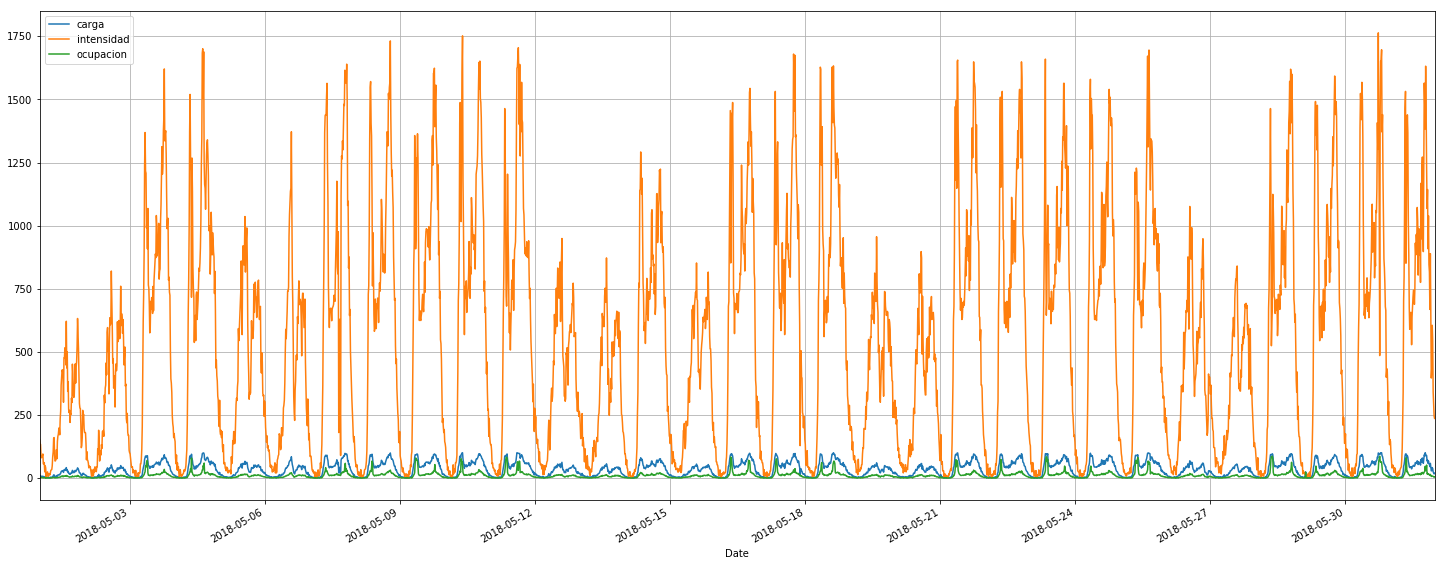

In [31]:
#data0518.filter(like='7035', axis=0)

#EN ESTE CASO SE OBSERVA LA VARIACIÓN DE LA INTENSIDAD DE TRÁFICO CON EL TIEMPO DURANTE TODO EL MES
data0518.loc[data0518['id'] == 6806].plot(x='Date',y=['carga','intensidad','ocupacion'],figsize=(25,10),grid=True)

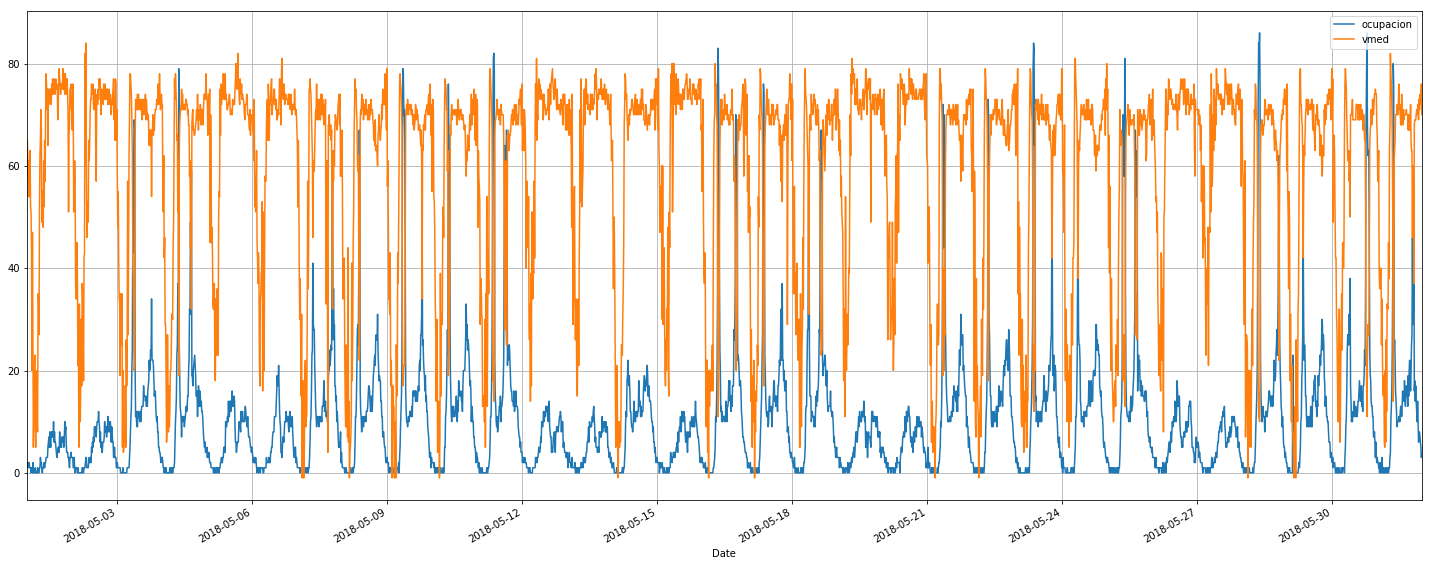

In [32]:
data0518.loc[data0518['id'] == 6806].plot(x='Date',y=['ocupacion','vmed'],figsize=(25,10),grid=True)

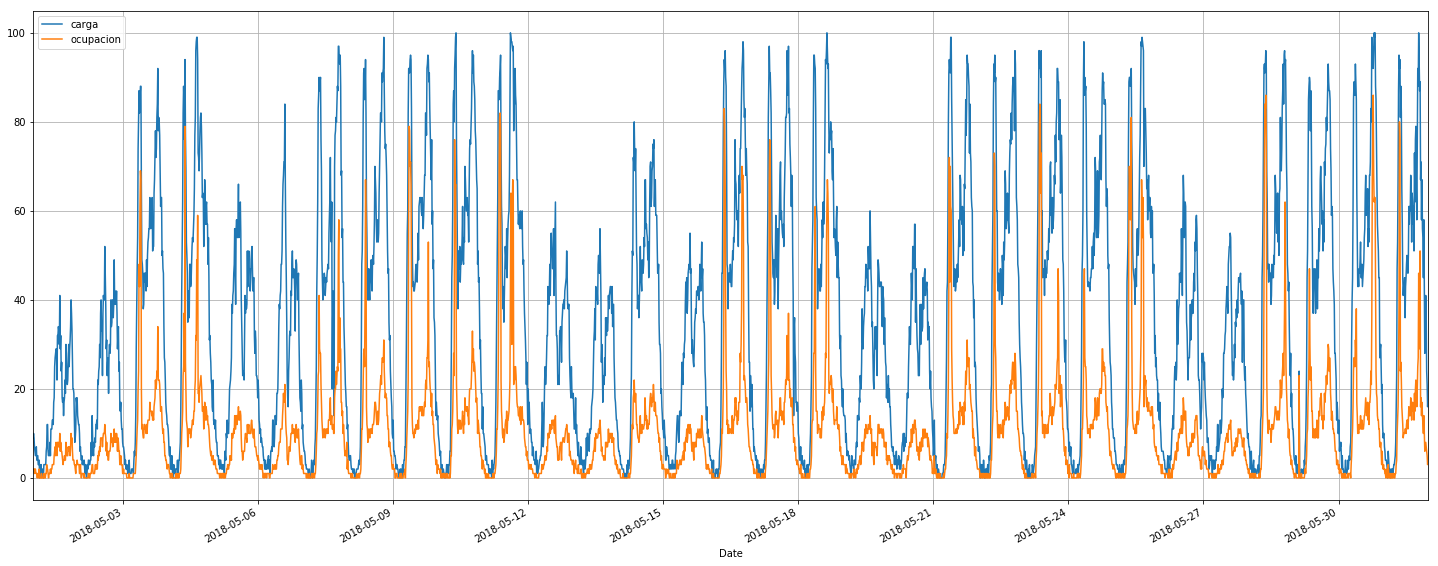

In [33]:
data0518.loc[data0518['id'] == 6806].plot(x='Date',y=['carga','ocupacion'],figsize=(25,10),grid=True)

In [34]:
df_id6806=data0518.loc[data0518['id'] == 6806].reset_index()
df_id6806.head()

,index,id,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion,Fecha,Hora,Date
0,3174,6806,M30,152,2,9,58,N,15,2018-05-01,00:00:00,2018-05-01 00:00:00
1,7035,6806,M30,136,2,10,65,N,15,2018-05-01,00:15:00,2018-05-01 00:15:00
2,10911,6806,M30,133,2,9,62,N,15,2018-05-01,00:30:00,2018-05-01 00:30:00
3,14784,6806,M30,91,1,7,56,N,15,2018-05-01,00:45:00,2018-05-01 00:45:00
4,18661,6806,M30,80,2,6,54,N,15,2018-05-01,01:00:00,2018-05-01 01:00:00


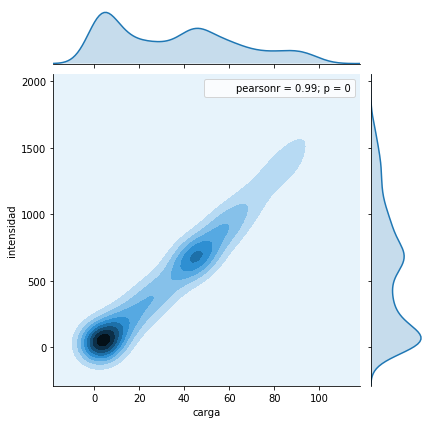

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.jointplot(df_id6806['carga'], df_id6806['intensidad'], kind='kde')

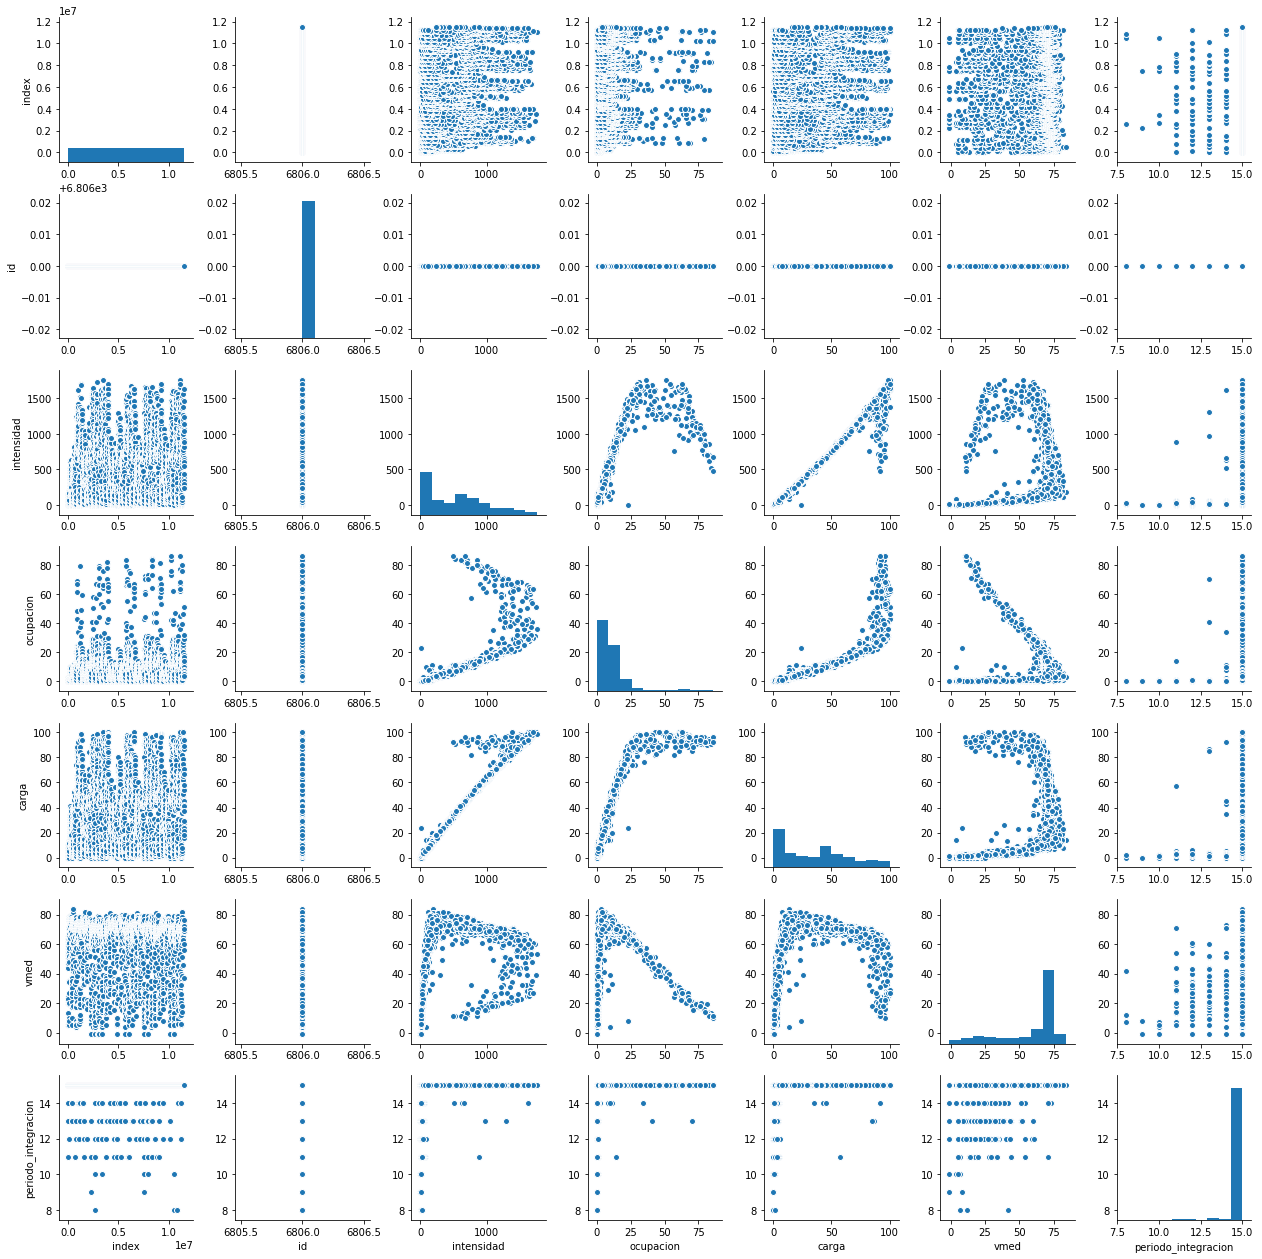

In [36]:
sns.pairplot(df_id6806)

#### Para comparar fechas hay que usar el método datetime
df_id6806['Fecha'][1] == datetime(2018, 5, 1).date()

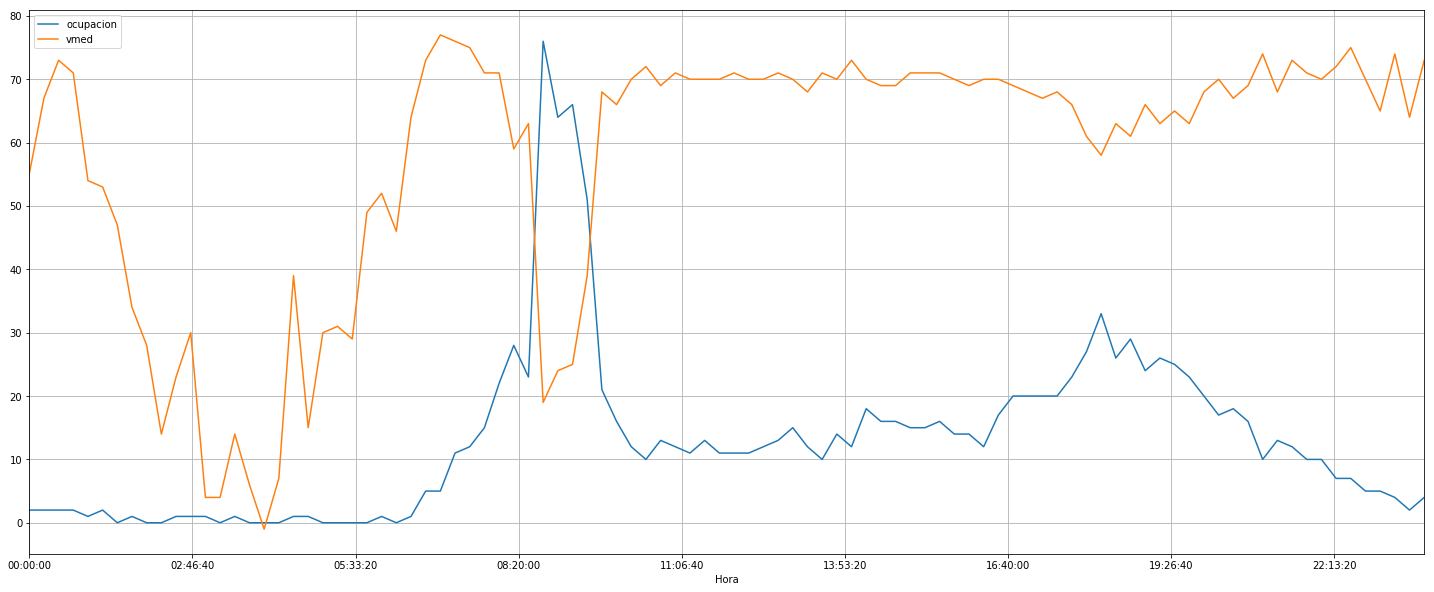

In [37]:
#ANALISIS POR HORAS EN UN DÍA PARA ESTE SENSOR
from datetime import datetime
df_id6806.loc[df_id6806['Fecha'] == datetime(2018, 5, 10).date()].plot(x='Hora',y=['ocupacion','vmed'],figsize=(25,10),grid=True)

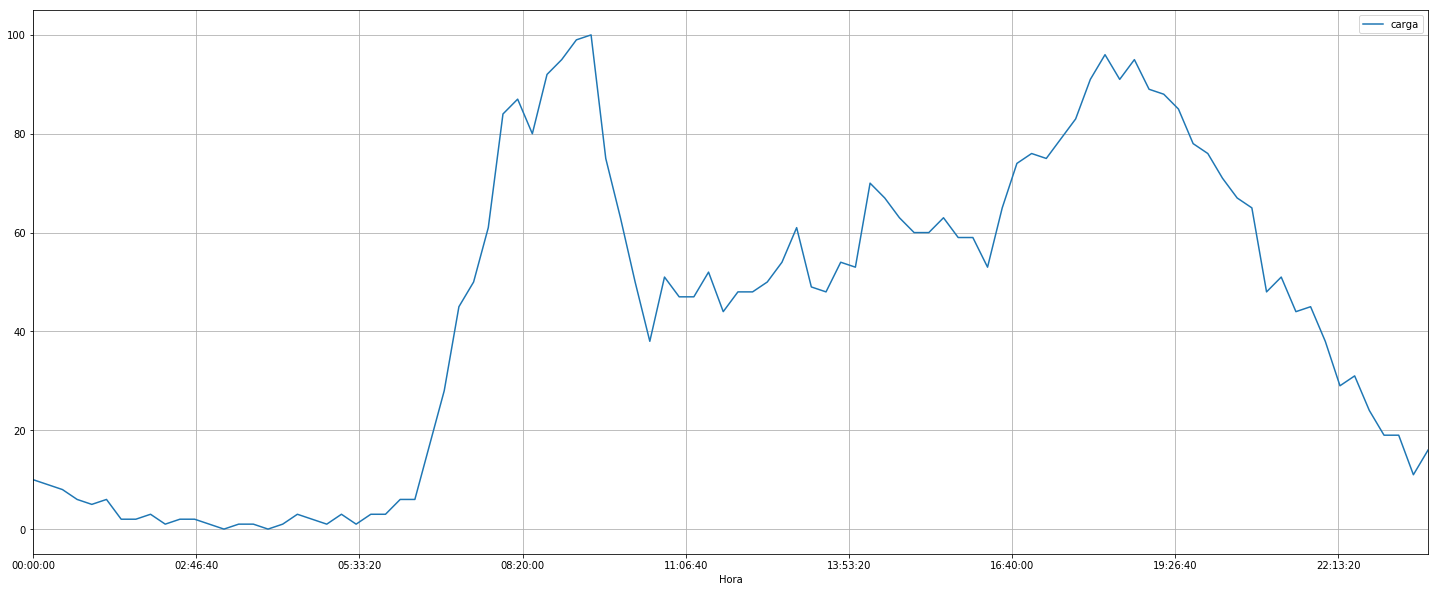

In [38]:
df_id6806.loc[df_id6806['Fecha'] == datetime(2018, 5, 10).date()].plot(x='Hora',y=['carga'],figsize=(25,10),grid=True)

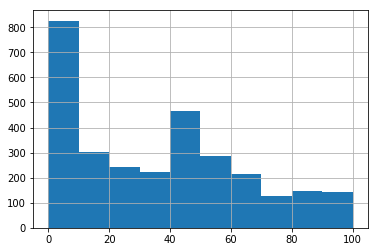

In [46]:
df_id6806['carga'].hist()

Tomar un día cualquiera, de un mes concreto a una hora especificada y ver la lectura de todos los sensores. 
Estudiar la carga, ocupación y la intensidad para cada tipo de sensor (M30 o URB).

Coger los datos de un sensor y estimar la ocupación en ese tramo con un modelo simple, dada una hora de entrada.

Probar con coger una serie temporal de un sensor y ver su evolución, buscando patrones que se repiran a lo largo de las semanas

Traffic flow has been considered as a stochastic process at least since Adams
(1936). He formulated the idea of arrivals as a random (i.e., Poisson) process
and verified good agreement with theory and observations.

see: http://lib.tkk.fi/Diss/199X/isbn951228474X/isbn951228474X.pdf